In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [6]:
import requests
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7293673d7092ef3881f04c25546df694


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace("Cabo","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yamoussoukro
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | amapa
Processing Record 5 of Set 1 | isangel
Processing Record 6 of Set 1 | cidreira
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | victoria
Processing Record 9 of Set 1 | grand centre
City not found. Skipping...
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | kango
Processing Record 14 of Set 1 | inhambane
Processing Record 15 of Set 1 | narsaq
Processing Record 16 of Set 1 | atherton
Processing Record 17 of Set 1 | amderma
City not found. Skipping...
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | cabo san lucas
Processing Record 21 of Set 1 | buala
Processing Record 22 of Set 1

Processing Record 39 of Set 4 | osakarovka
Processing Record 40 of Set 4 | okhotsk
Processing Record 41 of Set 4 | jabiru
City not found. Skipping...
Processing Record 42 of Set 4 | cairo
Processing Record 43 of Set 4 | port macquarie
Processing Record 44 of Set 4 | linchuan
City not found. Skipping...
Processing Record 45 of Set 4 | dickinson
Processing Record 46 of Set 4 | buchanan
Processing Record 47 of Set 4 | urbano santos
Processing Record 48 of Set 4 | xichang
Processing Record 49 of Set 4 | bethel
Processing Record 50 of Set 4 | pasighat
Processing Record 1 of Set 5 | esperance
Processing Record 2 of Set 5 | san felipe
Processing Record 3 of Set 5 | mayumba
Processing Record 4 of Set 5 | ngama
Processing Record 5 of Set 5 | nanortalik
Processing Record 6 of Set 5 | saint george
Processing Record 7 of Set 5 | lata
Processing Record 8 of Set 5 | salalah
Processing Record 9 of Set 5 | kendrapara
Processing Record 10 of Set 5 | klaksvik
Processing Record 11 of Set 5 | fagernes
Pro

Processing Record 26 of Set 8 | hokitika
Processing Record 27 of Set 8 | santa marta
Processing Record 28 of Set 8 | chagda
City not found. Skipping...
Processing Record 29 of Set 8 | bakal
Processing Record 30 of Set 8 | hualmay
Processing Record 31 of Set 8 | amga
Processing Record 32 of Set 8 | sorland
Processing Record 33 of Set 8 | kemijarvi
Processing Record 34 of Set 8 | ondorhaan
City not found. Skipping...
Processing Record 35 of Set 8 | meulaboh
Processing Record 36 of Set 8 | anadyr
Processing Record 37 of Set 8 | noshiro
Processing Record 38 of Set 8 | greencastle
Processing Record 39 of Set 8 | pasni
Processing Record 40 of Set 8 | orange cove
Processing Record 41 of Set 8 | beeville
Processing Record 42 of Set 8 | la asuncion
Processing Record 43 of Set 8 | north myrtle beach
Processing Record 44 of Set 8 | palu
Processing Record 45 of Set 8 | igarapava
Processing Record 46 of Set 8 | longyearbyen
Processing Record 47 of Set 8 | itabira
Processing Record 48 of Set 8 | nec

Processing Record 12 of Set 12 | meyungs
City not found. Skipping...
Processing Record 13 of Set 12 | hearst
Processing Record 14 of Set 12 | matara
Processing Record 15 of Set 12 | camacupa
Processing Record 16 of Set 12 | tautira
Processing Record 17 of Set 12 | nanakuli
Processing Record 18 of Set 12 | portland
Processing Record 19 of Set 12 | altus
Processing Record 20 of Set 12 | bereda
Processing Record 21 of Set 12 | wabana
Processing Record 22 of Set 12 | zhangye
Processing Record 23 of Set 12 | novopokrovka
Processing Record 24 of Set 12 | bandipur
Processing Record 25 of Set 12 | phangnga
Processing Record 26 of Set 12 | bougouni
Processing Record 27 of Set 12 | awjilah
Processing Record 28 of Set 12 | wattegama
Processing Record 29 of Set 12 | ambon
Processing Record 30 of Set 12 | aleysk
Processing Record 31 of Set 12 | bajos de haina
Processing Record 32 of Set 12 | kushiro
Processing Record 33 of Set 12 | roscommon
Processing Record 34 of Set 12 | dauphin
Processing Recor

In [10]:
len(city_data)

561

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yamoussoukro,6.8206,-5.2767,86.00,70,40,4.61,CI,2021-03-28 18:55:43
1,Jamestown,42.0970,-79.2353,46.99,87,90,20.22,US,2021-03-28 18:55:43
2,Busselton,-33.6500,115.3333,55.99,94,0,6.29,AU,2021-03-28 18:55:43
3,Amapa,1.0000,-52.0000,77.14,96,100,4.09,BR,2021-03-28 18:55:44
4,Isangel,-19.5500,169.2667,76.50,87,6,5.77,VU,2021-03-28 18:55:44
5,Cidreira,-30.1811,-50.2056,79.61,67,12,5.32,BR,2021-03-28 18:55:45
6,Ushuaia,-54.8000,-68.3000,46.40,61,40,29.93,AR,2021-03-28 18:55:45
7,Victoria,22.2855,114.1577,75.99,89,9,5.79,HK,2021-03-28 18:55:12
8,Hobart,-42.8794,147.3294,53.60,58,75,14.97,AU,2021-03-28 18:55:46
9,Mataura,-46.1927,168.8643,51.01,98,100,2.30,NZ,2021-03-28 18:55:46


In [12]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yamoussoukro,CI,2021-03-28 18:55:43,6.8206,-5.2767,86.00,70,40,4.61
1,Jamestown,US,2021-03-28 18:55:43,42.0970,-79.2353,46.99,87,90,20.22
2,Busselton,AU,2021-03-28 18:55:43,-33.6500,115.3333,55.99,94,0,6.29
3,Amapa,BR,2021-03-28 18:55:44,1.0000,-52.0000,77.14,96,100,4.09
4,Isangel,VU,2021-03-28 18:55:44,-19.5500,169.2667,76.50,87,6,5.77
...,...,...,...,...,...,...,...,...,...
556,Ongandjera,NA,2021-03-28 18:59:45,-17.8833,15.0667,79.00,44,15,7.49
557,Melfort,CA,2021-03-28 18:59:46,52.8667,-104.6177,41.00,65,95,17.27
558,North Bend,US,2021-03-28 18:59:47,43.4065,-124.2243,52.00,81,90,13.80
559,Karasjok,NO,2021-03-28 18:59:48,69.4719,25.5112,33.80,60,0,9.22


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

PermissionError: [Errno 13] Permission denied: 'weather_data/cities.csv'

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

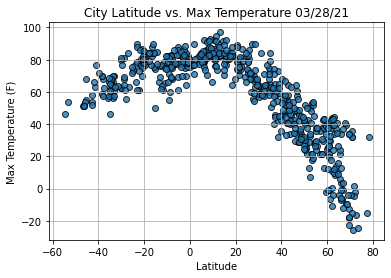

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

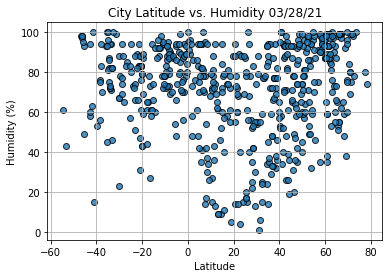

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

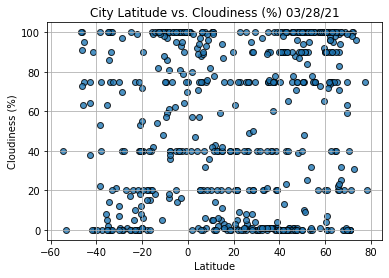

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

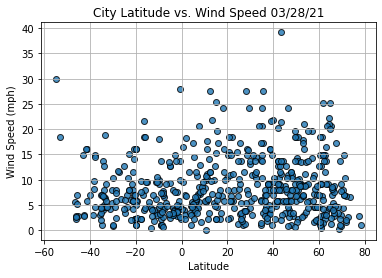

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                       Narsaq
Country                        GL
Date          2021-03-28 18:55:47
Lat                       60.9167
Lng                        -46.05
Max Temp                     26.6
Humidity                       59
Cloudiness                      0
Wind Speed                   9.22
Name: 13, dtype: object

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

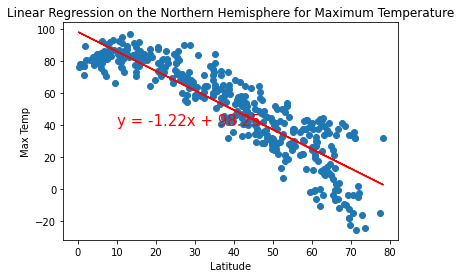

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

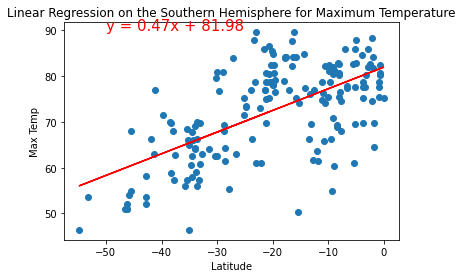

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

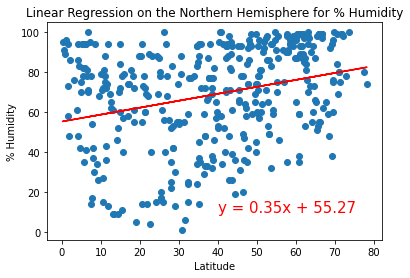

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

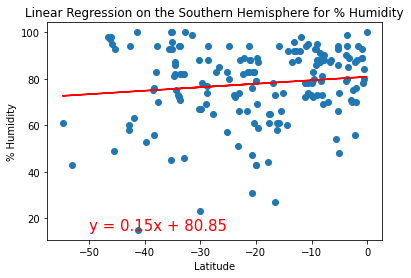

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

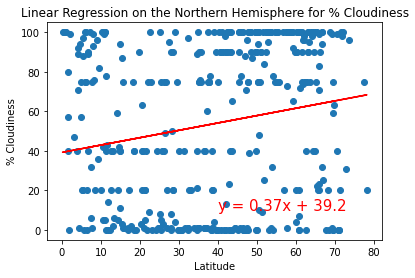

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

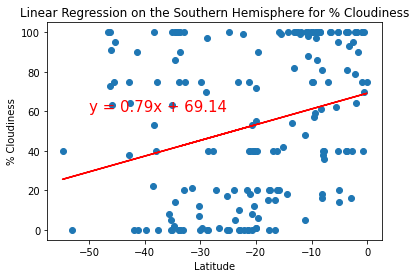

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

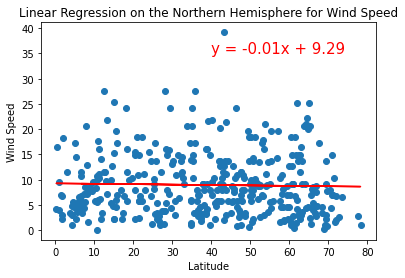

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))